# Predicting heart disease using machine learning
This notebooks use various Python-ml libraries to build a machine learning ,odel to predict wether someone has disease or not.
We're going to take the following approach:
1. Problem definitions
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem definition
In a statement, 
> Given clinical parameters about patent, could we predict whether someone has heart disease or not.
## 2. Data
The original data came from UCI Machine learning repositiory

There is also a version of it on Kaggle.
## 3. Evaluation
> If we can reach 95 percent of accuracy on model, then we will pursue it and put into application.
## 4. Features
**Create data dictionary**
* 
* 
* 
* 
* 
* 
* 
* 


## Preparing tools
We're gonna use pandas, matplotlib, numpy for data analysis and manipulation.

In [2]:
# Import all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Model evaluation form sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [3]:
df = pd.read_csv('heart-disease.csv')
df.shape # (rows, columns)

(303, 14)

## Data exploration analysis(EDA)
the goal here is to find more about the data and become a subject matter expert on the dataset you're working with.
1. What questions are we trying to solve?
2. What kind of data do we have and how we treat them? (categorical or numbers)
3. What's missing from the data
4. Where are the outliers and why you should care about them? 

(outliers are typically samples from data that are very different from others typically mistakes from data)

5. How you add, change or remove features to get the most of them.`

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Let's find out how many each class have
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

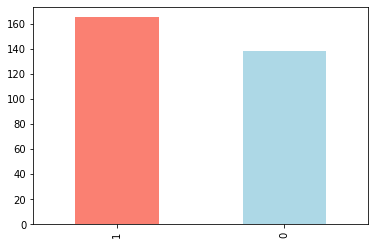

In [7]:
# Plot the target columns
df.target.value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target columns to sex columns
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


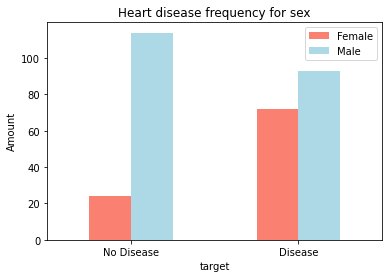

In [13]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Heart disease frequency for sex')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(ticks=[0, 1], rotation=0, labels=['No Disease', 'Disease']);

## Heart disease frequency according to chest pain type

In [14]:
df.cp.mean()

0.966996699669967

In [15]:
# Compare chol columns to sex columns
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


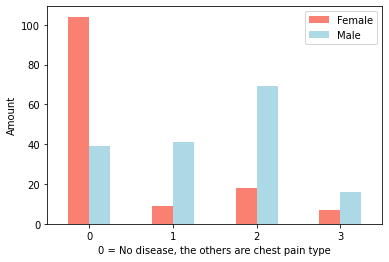

In [16]:
pd.crosstab(df.cp, df.target).plot(kind='bar', color=['salmon', 'lightblue']);
plt.xticks(rotation=0, ticks=[0,1,2,3], labels=[0, 1, 2, 3])
plt.xlabel('0 = No disease, the others are chest pain type')
plt.ylabel('Amount')
plt.legend(['Female', 'Male']);

Questions: how to compare numbers columns to target columns, which kind of plot should be used?

Answers: We should use scatter plot. Note that everytime we call plt.scatter, it only takes 1 type compare to plt.bar which can perform plot with mulitple types at once. I will demonstrate below

### Age vs Max heart rate for heart disease

In [17]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

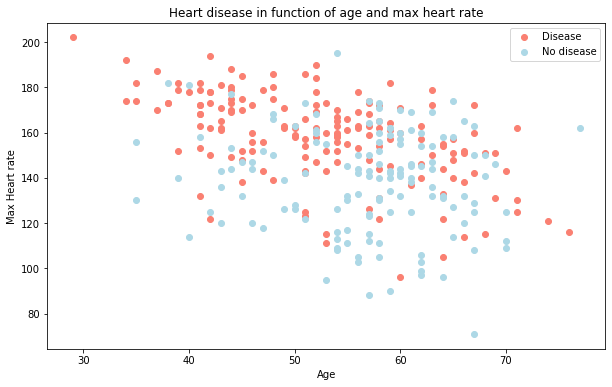

In [18]:
# Create another figure
plt.figure(figsize=(10, 6))

# Plot positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],# Note here a Series from PD dataframe can be passed with conditions
           c='salmon');
# Plot negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue');
# Add some helpful info
plt.title('Heart disease in function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart rate')
plt.legend(['Disease', 'No disease']);

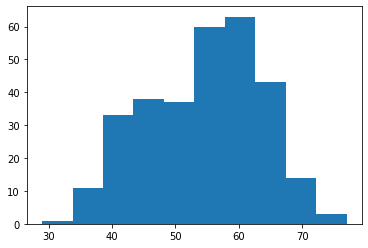

In [19]:
# Check the distribution of Age
df.age.hist(grid=False);

### Heart disease frequency per chest pain type

In [20]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


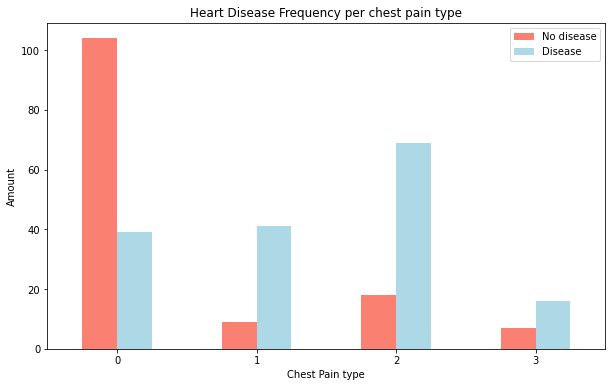

In [21]:
# Make crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue']); 
# What happend when we plot a crosstab? Or plotting a dataframe remember
plt.title('Heart Disease Frequency per chest pain type')
plt.xlabel('Chest Pain type')
plt.ylabel('Amount')
plt.legend(['No disease', 'Disease']);
plt.xticks(rotation=0);

<BarContainer object of 303 artists>

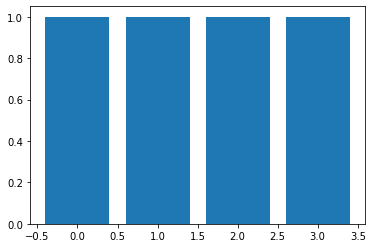

In [22]:
plt.bar(df.cp, df.target)

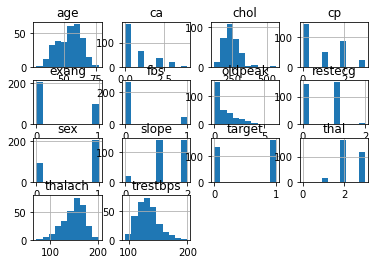

In [23]:
df.hist()
plt.show();
%matplotlib inline

In [24]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


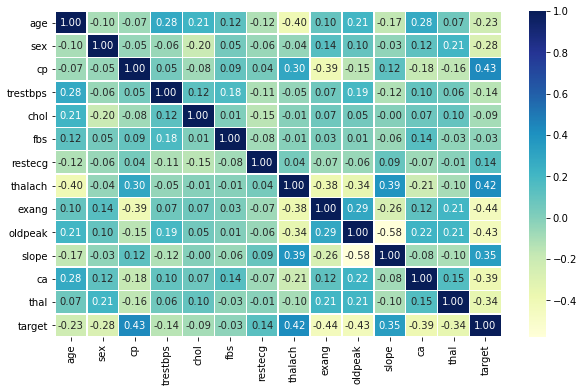

In [25]:
# Let's make our correlation matrix prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,
                annot= True,
                linewidths=0.5,
                fmt=".2f",
                cmap='YlGnBu');

# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom+0.5, top-0.5)

## 5.Modeling

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
# Split data into X and y
X = df.drop('target', axis=1)
y = df.target

In [28]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [29]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [30]:
# Split data into train and test set
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [32]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now've got our data split into training and test set. We try to find a pattern on training set and predict on test set

We're goind to try 3 different models:
1. Logistics Regression
2. K Nearest Neighbors
3. Random Forest CLassifier

In [33]:
# Put models in dictionart
models = {'Logistic Regression': LogisticRegression(),
         'K Nearest Neighbors': KNeighborsClassifier(),
         'Random Forest Classifier': RandomForestClassifier()}
# Create a functon
def fit_score_model(models, X_train, X_test, y_train, y_test,):
    '''
    Fit and evaluate different machine learning model.
    Models: A dict of sklearn machine learning model
    '''
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
model_scores = fit_score_model(models, X_train, X_test, y_train, y_test)

C:\Users\pc\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
model_pd = pd.DataFrame(model_scores, index=['accuracy'])
model_pd

,Logistic Regression,K Nearest Neighbors,Random Forest Classifier
accuracy,0.885246,0.688525,0.836066


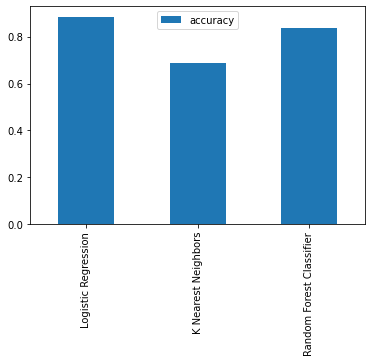

In [35]:
model_pd.T.plot(kind='bar')

Let's look at the following:
* Hyper parameter tuning
* feature importants
* confusion matrix
* cross validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyper parameter tuning

In [36]:
# Let's tune KNN
train_scores = []
test_scores = []
# Create a list of different neighbors
neighbors = range(1, 21)
# Instantiate KNN
knn = KNeighborsClassifier()
# Loop through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors= i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


In [37]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [38]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score on the test data: 75.41%


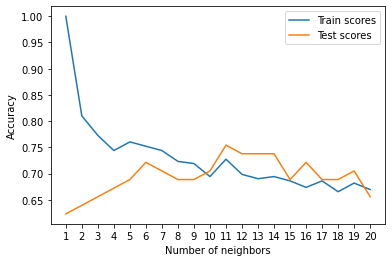

In [39]:
plt.plot(neighbors, train_scores)
plt.plot(neighbors, test_scores)
plt.legend(['Train scores', 'Test scores'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,21,1))
print(f'Max KNN score on the test data: {max(test_scores)*100:.2f}%')

## Hyper parameter tuning with RandomizedSearchCv
* We're going to tune logistic regression and RandomForest Classifier using RandommizedSearchCV

In [40]:
# Create a paramter grid for logistic regression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear'],}
# Create a paramter grid for Randomforest Classifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

Now've got hyperparamter grid setups for each of our model, let's tune them using RandomizedSearchCV

In [41]:
# Tune logistic Regression
np.random.seed(42)
# Set up hyper parameter random search on logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               verbose=2,
                               n_iter=20)
# Fit into data
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... solver=liblinear, C=0.00026366508987303583, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... so

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........ solver=liblinear, C=0.0006951927961775605, total=   0.0s
[CV] solver=liblinear, C=0.0006951927961775605 .......................
[CV] ........ solver=liblinear, C=0.0006951927961775605, total=   0.0s
[CV] solver=liblinear, C=0.0018329807108324356 .......................
[CV] ........ solver=liblinear, C=0.0018329807108324356, total=   0.0s
[CV] solver=liblinear, C=0.0018329807108324356 .......................
[CV] ........ solver=liblinear, C=0.0018329807108324356, total=   0.0s
[CV] solver=liblinear, C=0.0018329807108324356 .......................
[CV] ........ solver=liblinear, C=0.0018329807108324356, total=   0.0s
[CV] solver=liblinear, C=0.0018329807108324356 .......................
[CV] ........ solver=liblinear, C=0.0018329807108324356, total=   0.0s
[CV] solver=liblinear, C=0.0018329807108324356 .......................
[CV] ........ solver=liblinear, C=0.0018329807108324356, total=   0.0s
[CV] solver=liblinear, C=0.004832930238571752 ........................
[CV] .

[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.0s
[CV] solver=liblinear, C=545.5594781168514 ...........................
[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.0s
[CV] solver=liblinear, C=545.5594781168514 ...........................
[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.0s
[CV] solver=liblinear, C=545.5594781168514 ...........................
[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.0s
[CV] solver=liblinear, C=545.5594781168514 ...........................
[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.0s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.0s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.0s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [43]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [44]:
# Tuning Random Forest Classifier
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions= rf_grid,
                          cv=5, verbose=2, n_iter=20)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.1s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.2s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.1s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.0s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.1s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_sam

[CV]  n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5, total=   0.6s
[CV] n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5 
[CV]  n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5, total=   0.6s
[CV] n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5 
[CV]  n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5, total=   0.7s
[CV] n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5 
[CV]  n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5, total=   0.7s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.8s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.8s
[CV] n_estimators=910, min_samples_split=18, min

[CV]  n_estimators=560, min_samples_split=6, min_samples_leaf=7, max_depth=3, total=   1.2s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [45]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [46]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Evaluating classifying machine learning model, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score
... and maybe great if we have cross-validation
* Note that when making comparison, we must need predictions to compare to the truth labels.

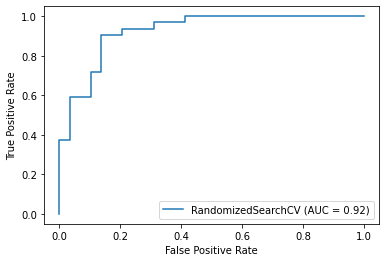

In [51]:
plot_roc_curve(rs_log_reg, X_test, y_test)

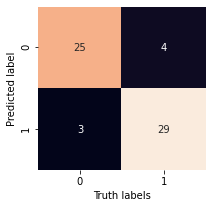

In [55]:
def plot_conf_mat(y_test, y_preds):
    '''
    This function plot confusion matrix with heatmap
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    cbar= False,
                    annot= True)
    plt.xlabel('Truth labels')
    plt.ylabel('Predicted label')
    
plot_conf_mat(y_test, y_preds)

In [56]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [57]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [58]:
clf = LogisticRegression(solver= 'liblinear', C=0.23357214690901212)

In [69]:
from sklearn.model_selection import cross_val_score
cv_acc = np.mean(cross_val_score(clf, X, y, scoring='accuracy', cv= 10))

In [67]:
cv_precision = np.mean(cross_val_score(clf, X, y, scoring='precision', cv=5))

In [66]:
cv_f1 = np.mean(cross_val_score(clf, X, y, scoring='f1', cv= 10))

In [68]:
cv_recall = np.mean(cross_val_score(clf, X, y, scoring='recall', cv=10))

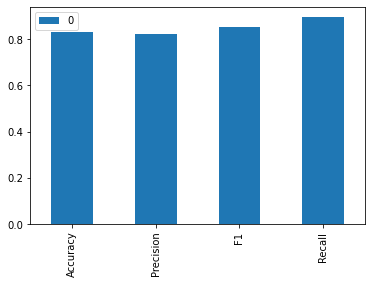

In [75]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'F1': cv_f1,
                          'Recall': cv_recall}, 
                         index= [0])
cv_metrics.T.plot.bar()

## Feature importance
Which features contributed most to the outcome of our model, and maybe how they perform

In [78]:
# Fit an instance of logistic regression
rs_log_reg.best_params_
clf = LogisticRegression(solver= 'liblinear', C= 0.23357214690901212)

clf.fit(X_train, y_train);

In [80]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [79]:
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [82]:
feature_dict= dict(zip(df.columns, clf.coef_[0]))
feature_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

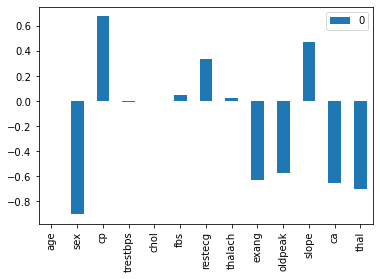

In [84]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar();

In [86]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [87]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
